In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuração de exibição
pd.set_option("display.max_columns", 50)

# Caminhos
BASE_DIR = Path.cwd().parents[0] if Path.cwd().name == "notebooks" else Path.cwd()
DATA_DIR = BASE_DIR / "data" / "final"

# Carrega base final do Brasileirão
df = pd.read_csv(DATA_DIR / "brasileirao_final.csv")

# Ajustes finais de segurança
df["gols_visitante"] = df["gols_visitante"].fillna(0)
df["resultado"] = df["resultado"].fillna("empate")

print("Shape:", df.shape)
df.head()


Shape: (8453, 41)


,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,tecnico_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,idade_media_titular_mandante,idade_media_titular_visitante,gols_mandante,gols_visitante,gols_1_tempo_mandante,gols_1_tempo_visitante,escanteios_mandante,escanteios_visitante,faltas_mandante,faltas_visitante,chutes_bola_parada_mandante,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante,resultado,pontos_mandante,pontos_visitante,mandante_venceu,visitante_venceu,empate_flag
0,2003,2003-05-04,1,Estádio Brinco de Ouro da Princesa,Não informado,12685.0,37182.0,Guarani,Vasco da Gama,Desconhecido,Desconhecido,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mandante,3,0,1,0,0
1,2003,2003-05-04,1,Estádio Governador Magalhães Pinto,Não informado,12685.0,37182.0,Cruzeiro,São Caetano,Desconhecido,Desconhecido,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,empate,1,1,0,0,1
2,2003,2003-05-04,1,Estádio Jornalista Mário Filho,Não informado,12685.0,37182.0,Flamengo,Coritiba FC,Desconhecido,Desconhecido,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,empate,1,1,0,0,1
3,2003,2003-05-04,1,Estádio Governador Plácido Castelo,Não informado,12685.0,37182.0,Fortaleza,EC Bahia,Desconhecido,Desconhecido,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,empate,1,1,0,0,1
4,2003,2003-05-04,1,Estádio de Hailé Pinheiro,Não informado,12685.0,37182.0,Goiás EC,Paysandu SC,Desconhecido,Desconhecido,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,empate,1,1,0,0,1


In [2]:
def construir_base_times(df):
    """
    Constrói uma base em que cada linha é a perspectiva de um time em uma partida.
    """

    # Mandantes
    mandante = pd.DataFrame({
        "time": df["time_mandante"],
        "adversario": df["time_visitante"],
        "casa_fora": "casa",
        "ano_campeonato": df["ano_campeonato"],
        "gols_pro": df["gols_mandante"],
        "gols_contra": df["gols_visitante"],
        "chutes_pro": df["chutes_mandante"],
        "chutes_contra": df["chutes_visitante"],
        "escanteios_pro": df["escanteios_mandante"],
        "escanteios_contra": df["escanteios_visitante"],
        "faltas_pro": df["faltas_mandante"],
        "faltas_contra": df["faltas_visitante"],
        "defesas_pro": df["defesas_mandante"],
        "defesas_contra": df["defesas_visitante"],
        "vitoria": (df["mandante_venceu"] == 1).astype(int),
        "empate": (df["empate_flag"] == 1).astype(int),
        "derrota": (df["visitante_venceu"] == 1).astype(int),
    })

    # Visitantes
    visitante = pd.DataFrame({
        "time": df["time_visitante"],
        "adversario": df["time_mandante"],
        "casa_fora": "fora",
        "ano_campeonato": df["ano_campeonato"],
        "gols_pro": df["gols_visitante"],
        "gols_contra": df["gols_mandante"],
        "chutes_pro": df["chutes_visitante"],
        "chutes_contra": df["chutes_mandante"],
        "escanteios_pro": df["escanteios_visitante"],
        "escanteios_contra": df["escanteios_mandante"],
        "faltas_pro": df["faltas_visitante"],
        "faltas_contra": df["faltas_mandante"],
        "defesas_pro": df["defesas_visitante"],
        "defesas_contra": df["defesas_mandante"],
        "vitoria": (df["visitante_venceu"] == 1).astype(int),
        "empate": (df["empate_flag"] == 1).astype(int),
        "derrota": (df["mandante_venceu"] == 1).astype(int),
    })

    df_times = pd.concat([mandante, visitante], ignore_index=True)
    return df_times

df_times = construir_base_times(df)
print(df_times.shape)
df_times.head()


(16906, 17)


,time,adversario,casa_fora,ano_campeonato,gols_pro,gols_contra,chutes_pro,chutes_contra,escanteios_pro,escanteios_contra,faltas_pro,faltas_contra,defesas_pro,defesas_contra,vitoria,empate,derrota
0,Guarani,Vasco da Gama,casa,2003,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,Cruzeiro,São Caetano,casa,2003,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
2,Flamengo,Coritiba FC,casa,2003,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
3,Fortaleza,EC Bahia,casa,2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
4,Goiás EC,Paysandu SC,casa,2003,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0


In [3]:
def calcular_metricas_por_time(df_times):
    """
    Calcula métricas médias por time (todas as temporadas juntas).
    """

    agrupado = df_times.groupby("time").agg(
        jogos=("time", "count"),
        gols_pro=("gols_pro", "mean"),
        gols_contra=("gols_contra", "mean"),
        chutes_pro=("chutes_pro", "mean"),
        chutes_contra=("chutes_contra", "mean"),
        escanteios_pro=("escanteios_pro", "mean"),
        faltas_pro=("faltas_pro", "mean"),
        defesas_pro=("defesas_pro", "mean"),
        taxa_vitorias=("vitoria", "mean"),
        taxa_empates=("empate", "mean"),
        taxa_derrotas=("derrota", "mean"),
    )

    # Ordenar por taxa de vitórias só para visualizar
    agrupado = agrupado.sort_values("taxa_vitorias", ascending=False)
    return agrupado

metricas_times = calcular_metricas_por_time(df_times)
metricas_times.head(10)


,jogos,gols_pro,gols_contra,chutes_pro,chutes_contra,escanteios_pro,faltas_pro,defesas_pro,taxa_vitorias,taxa_empates,taxa_derrotas
time,,,,,,,,,,,
Palmeiras,751,1.468708,1.125166,4.319574,3.332889,2.030626,5.292943,1.098535,0.451398,0.259654,0.288948
São Paulo,826,1.412833,1.066586,3.357143,2.899516,1.680387,4.594431,0.980630,0.446731,0.279661,0.273608
Flamengo,826,1.430993,1.175545,3.681598,3.007264,1.837772,4.430993,0.969734,0.433414,0.267554,0.299031
Internacional,787,1.331639,1.086404,3.407878,3.213469,1.667090,5.091487,1.071156,0.430750,0.264295,0.304956
Grêmio,751,1.370173,1.119840,3.117177,2.970706,1.597870,4.199734,0.946738,0.428762,0.250333,0.320905
Santos FC,684,1.486842,1.191520,1.269006,1.247076,0.862573,2.552632,0.533626,0.428363,0.258772,0.312865
Cruzeiro,713,1.410940,1.185133,1.831697,1.622721,1.086957,2.793829,0.643759,0.427770,0.242637,0.329593
Atlético-MG,787,1.448539,1.266836,3.796696,2.926302,1.883100,4.993647,1.007624,0.416773,0.260483,0.321474
Corinthians,788,1.274112,1.067259,3.241117,3.659898,1.651015,4.488579,1.130711,0.412437,0.299492,0.288071


In [5]:
def plot_radar_time(time, metricas_df, normalizar=True):
    """
    Plota um gráfico de radar para um time usando as métricas calculadas.
    """

    if time not in metricas_df.index:
        print(f"Time '{time}' não encontrado.")
        return

    # Seleciona métricas que fazem sentido no radar
    cols_radar = [
        "gols_pro",
        "gols_contra",
        "chutes_pro",
        "chutes_contra",
        "escanteios_pro",
        "faltas_pro",
        "defesas_pro",
        "taxa_vitorias",
    ]

    valores = metricas_df.loc[time, cols_radar].values.astype(float)

    # Opcional: normalização 0–1 para deixar escalas parecidas
    if normalizar:
        min_vals = metricas_df[cols_radar].min()
        max_vals = metricas_df[cols_radar].max()
        valores = (valores - min_vals.values) / (max_vals.values - min_vals.values + 1e-9)

    # Ajuste: inverter gols_contra e chutes_contra (menos é melhor)
    idx_gc = cols_radar.index("gols_contra")
    idx_cc = cols_radar.index("chutes_contra")
    valores[idx_gc] = 1 - valores[idx_gc]
    valores[idx_cc] = 1 - valores[idx_cc]

    labels = [
        "Gols Pró",
        "Gols Contra (↓)",
        "Chutes Pró",
        "Chutes Contra (↓)",
        "Escanteios Pró",
        "Faltas Pró",
        "Defesas Pró",
        "Taxa de Vitórias",
    ]

    # Fechar o círculo
    valores = np.concatenate((valores, [valores[0]]))
    angles = np.linspace(0, 2 * np.pi, len(labels) + 1)

    # Plot
    fig = plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)

    ax.plot(angles, valores, linewidth=2)
    ax.fill(angles, valores, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title(f"Perfil Estatístico - {time}", y=1.1)

    plt.show()


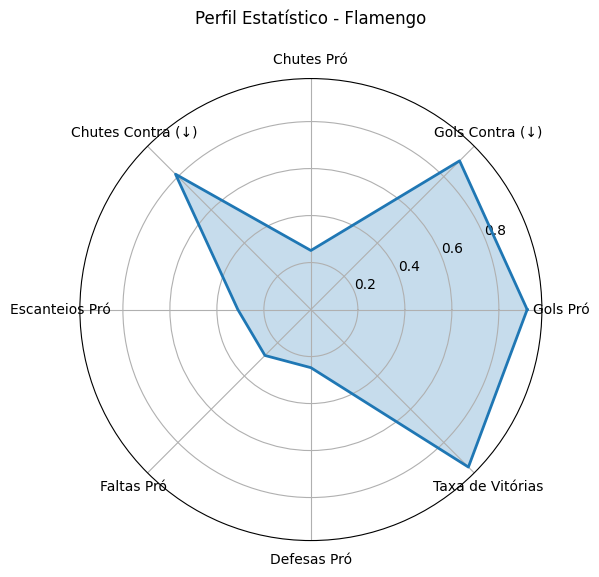

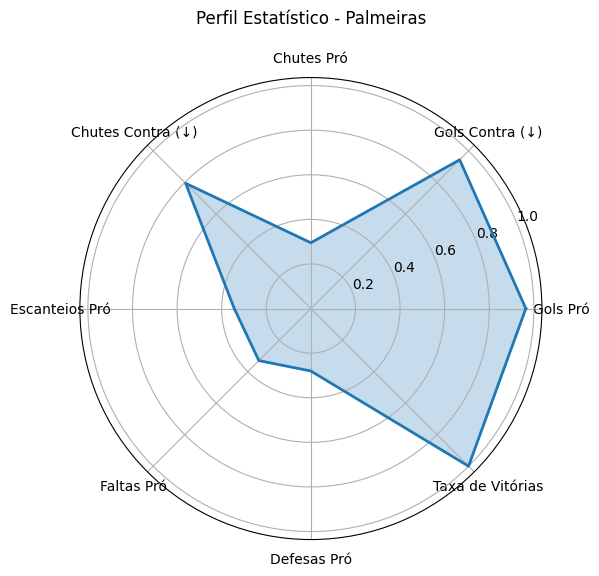

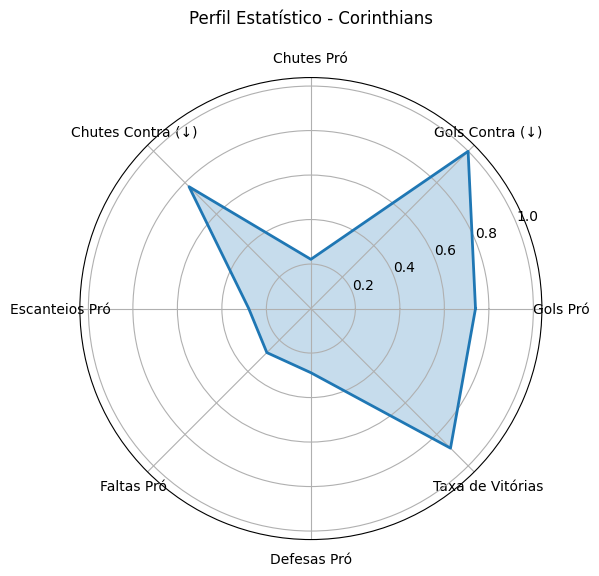

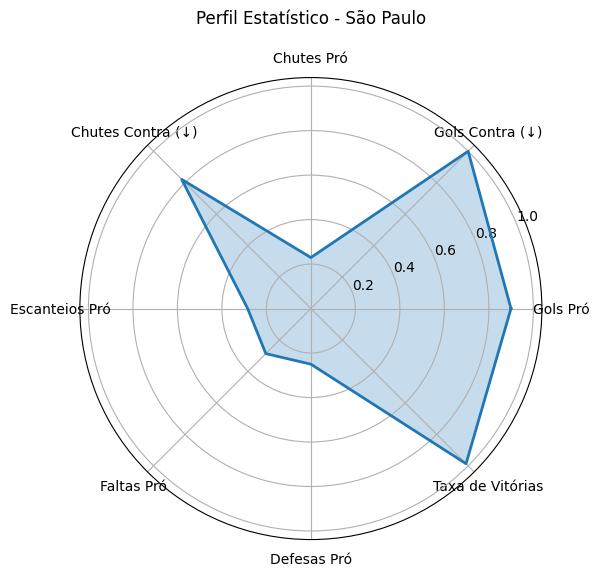

In [6]:
plot_radar_time("Flamengo", metricas_times)
plot_radar_time("Palmeiras", metricas_times)
plot_radar_time("Corinthians", metricas_times)
plot_radar_time("São Paulo", metricas_times)


In [7]:
def plot_radar_comparacao(time_a, time_b, metricas_df, normalizar=True):
    """
    Plota um radar comparando dois times.
    """

    for t in [time_a, time_b]:
        if t not in metricas_df.index:
            print(f"Time '{t}' não encontrado na base.")
            return

    cols_radar = [
        "gols_pro",
        "gols_contra",
        "chutes_pro",
        "chutes_contra",
        "escanteios_pro",
        "faltas_pro",
        "defesas_pro",
        "taxa_vitorias",
    ]

    data = metricas_df[cols_radar].copy()

    if normalizar:
        min_vals = data.min()
        max_vals = data.max()
        data = (data - min_vals) / (max_vals - min_vals + 1e-9)

    # inverter gols_contra e chutes_contra
    for col in ["gols_contra", "chutes_contra"]:
        data[col] = 1 - data[col]

    valores_a = data.loc[time_a].values
    valores_b = data.loc[time_b].values

    labels = [
        "Gols Pró",
        "Gols Contra (↓)",
        "Chutes Pró",
        "Chutes Contra (↓)",
        "Escanteios Pró",
        "Faltas Pró",
        "Defesas Pró",
        "Taxa de Vitórias",
    ]

    valores_a = np.concatenate((valores_a, [valores_a[0]]))
    valores_b = np.concatenate((valores_b, [valores_b[0]]))
    angles = np.linspace(0, 2 * np.pi, len(labels) + 1)

    fig = plt.figure(figsize=(7, 7))
    ax = plt.subplot(111, polar=True)

    ax.plot(angles, valores_a, linewidth=2, label=time_a)
    ax.fill(angles, valores_a, alpha=0.25)

    ax.plot(angles, valores_b, linewidth=2, linestyle="--", label=time_b)
    ax.fill(angles, valores_b, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title(f"Comparação de Perfil - {time_a} x {time_b}", y=1.1)
    ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

    plt.show()


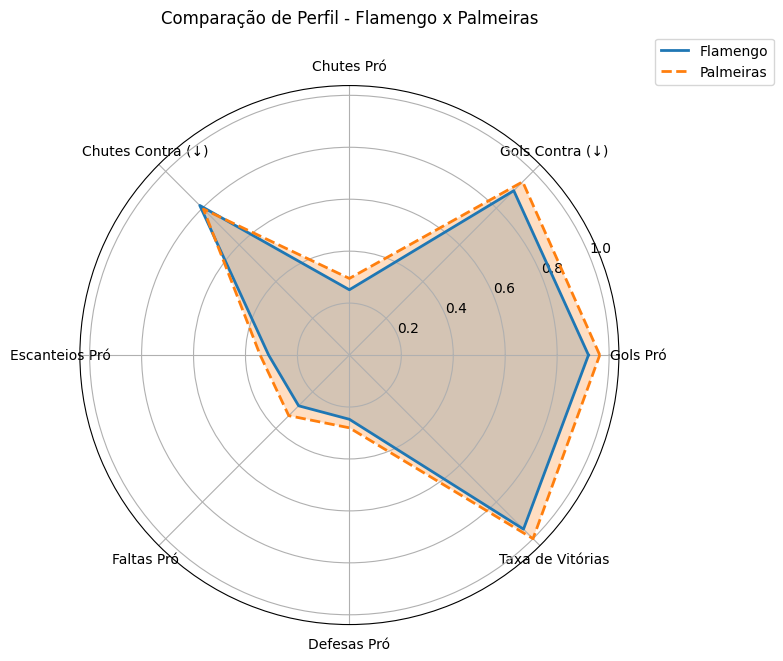

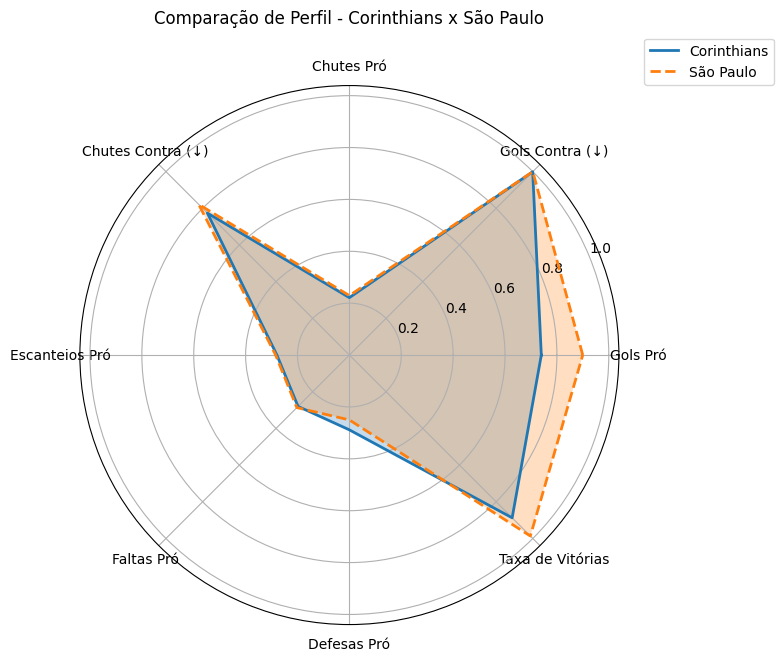

In [8]:
plot_radar_comparacao("Flamengo", "Palmeiras", metricas_times)
plot_radar_comparacao("Corinthians", "São Paulo", metricas_times)
